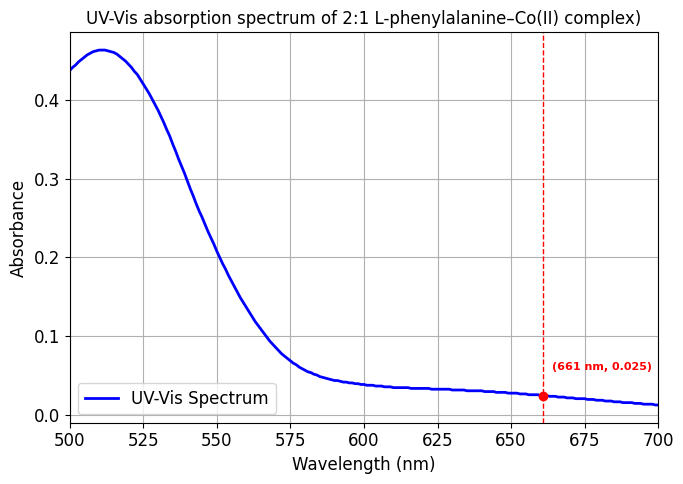

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('UV data.csv', header=None, names=['Wavelength', 'Absorbance'])


data['Wavelength'] = pd.to_numeric(data['Wavelength'], errors='coerce')
data['Absorbance'] = pd.to_numeric(data['Absorbance'], errors='coerce')
data = data.dropna()


filtered_data = data[(data['Wavelength'] >= 500) & (data['Wavelength'] <= 700)]


abs_661 = data.iloc[(data['Wavelength'] - 661).abs().argmin()]
wavelength_661 = abs_661['Wavelength']
absorbance_661 = abs_661['Absorbance']


plt.figure(figsize=(7, 5))
plt.plot(filtered_data['Wavelength'], filtered_data['Absorbance'], color='blue', linewidth=2, label='UV-Vis Spectrum')


plt.scatter(wavelength_661, absorbance_661, color='red', zorder=5)
plt.axvline(x=wavelength_661, color='red', linestyle='--', linewidth=1)


plt.text(wavelength_661 + 3, absorbance_661 + 0.03,
         f'(661 nm, {absorbance_661:.3f})', color='red',
         fontsize=8, ha='left', va='bottom', weight='bold')

plt.rcParams.update({
    "font.size": 12,
    "axes.labelsize": 12,
    "axes.titlesize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
})

plt.title('UV-Vis absorption spectrum of 2:1 L-phenylalanine–Co(II) complex)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.xlim(filtered_data['Wavelength'].min(), filtered_data['Wavelength'].max())
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


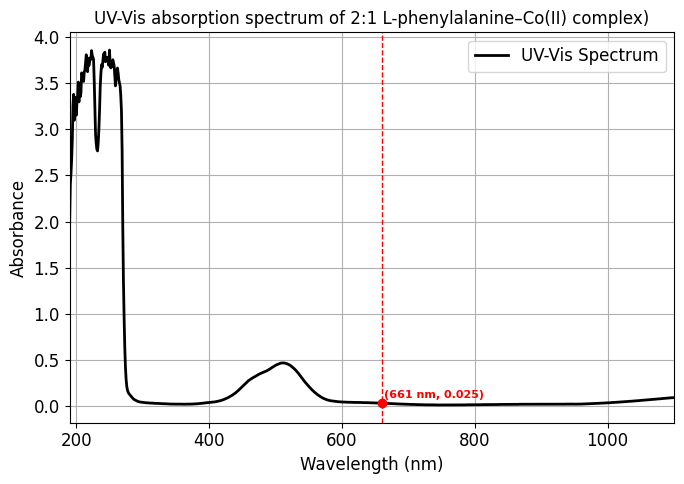

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('UV data.csv', header=None, names=['Wavelength', 'Absorbance'])


data['Wavelength'] = pd.to_numeric(data['Wavelength'], errors='coerce')
data['Absorbance'] = pd.to_numeric(data['Absorbance'], errors='coerce')
data = data.dropna()


filtered_data = data[(data['Wavelength'] >= 190) & (data['Wavelength'] <= 1100)]


abs_661 = data.iloc[(data['Wavelength'] - 661).abs().argmin()]
wavelength_661 = abs_661['Wavelength']
absorbance_661 = abs_661['Absorbance']


plt.figure(figsize=(7, 5))
plt.plot(filtered_data['Wavelength'], filtered_data['Absorbance'], color='black', linewidth=2, label='UV-Vis Spectrum')


plt.scatter(wavelength_661, absorbance_661, color='red', zorder=5)
plt.axvline(x=wavelength_661, color='red', linestyle='--', linewidth=1)


plt.text(wavelength_661 + 3, absorbance_661 + 0.03,
         f'(661 nm, {absorbance_661:.3f})', color='red',
         fontsize=8, ha='left', va='bottom', weight='bold')

plt.rcParams.update({
    "font.size": 12,
    "axes.labelsize": 12,
    "axes.titlesize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
})

plt.title('UV-Vis absorption spectrum of 2:1 L-phenylalanine–Co(II) complex)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.xlim(filtered_data['Wavelength'].min(), filtered_data['Wavelength'].max())
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


Fitted parameters:
  Slope (m) = 0.0043
  Y-intercept (c) = -0.0255


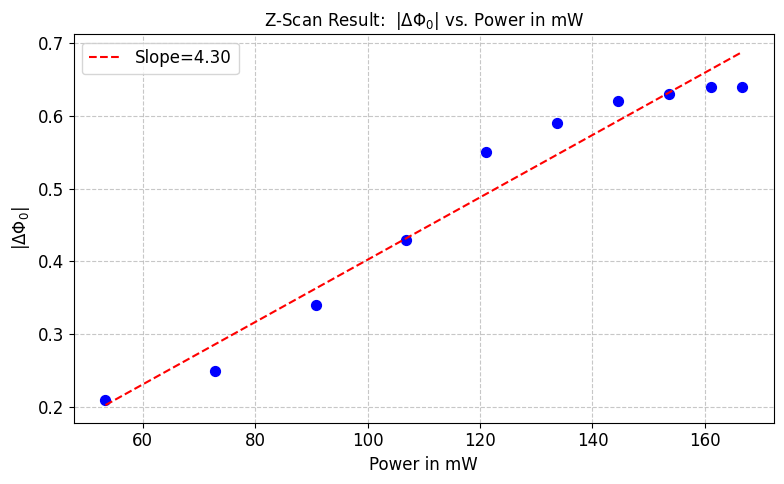


Data used for plotting:
   Power in mW  del_phil
0        53.38      0.21
1        72.93      0.25
2        90.74      0.34
3       106.81      0.43
4       121.14      0.55
5       133.72      0.59
6       144.56      0.62
7       153.66      0.63
8       161.02      0.64
9       166.63      0.64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np
from scipy.optimize import curve_fit

# Data from the zscan_data_csv immersive
csv_data = """
"Power in mW","|del_phil"," T_pv|"
"53.38","0.21","0.1134"
"72.93","0.25","0.1391"
"90.74","0.34","0.1684"
"106.81","0.43","0.1937"
"121.14","0.55","0.2347"
"133.72","0.59","0.2468"
"144.56","0.62","0.2621"
"153.66","0.63","0.2696"
"161.02","0.64","0.2796"
"166.63","0.64","0.2850"
"""

df = pd.read_csv(StringIO(csv_data))

# Clean column names by stripping quotes and extra spaces, and removing pipe characters
# The regex=True is used to ensure the | is treated as a literal character for replacement
df.columns = df.columns.str.replace(r'[|"]', '', regex=True).str.strip()

plt.rcParams.update({
    "font.size": 12,           # Match LaTeX \normalsize
    "axes.labelsize": 12,      # Axis labels
    "axes.titlesize": 12,      # Title of the graph
    "xtick.labelsize": 12,     # X-axis tick labels
    "ytick.labelsize": 12,     # Y-axis tick labels
    "legend.fontsize": 12,     # Legend text
})








# Select the relevant columns for plotting
# After cleaning, the column name is 'del_phil'
x_data = df['Power in mW']
y_data = df['del_phil']

# Define the fitting function (a straight line)
def linear_func(x, m, c):
    """
    A linear function model: y = m * x + c
    m: slope
    c: y-intercept
    """
    return m * x + c

# Initial guess for the parameters for a straight line
# m: estimated slope from visual inspection (change in y / change in x)
# c: estimated y-intercept
initial_guess = [0.005, 0.1] # Rough estimation based on the provided data

# Perform the curve fitting
try:
    params, covariance = curve_fit(linear_func, x_data, y_data, p0=initial_guess)
    m_fit, c_fit = params # Unpack fitted parameters for slope (m) and intercept (c)
    print(f"Fitted parameters:")
    print(f"  Slope (m) = {m_fit:.4f}")
    print(f"  Y-intercept (c) = {c_fit:.4f}")

    # Generate points for the fitted line
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = linear_func(x_fit, m_fit, c_fit)

    # Create the plot
    plt.figure(figsize=(8,5)) # Set figure size for better readability
    # Changed label to use LaTeX for delta phi symbol
    plt.scatter(x_data, y_data, color='blue', marker='o', s=50)
    # Updated label for fitted curve to include the fitted slope
    plt.plot(x_fit, y_fit, color='red', linestyle='--',label='Slope=4.30')

    # Add labels and title
    plt.xlabel('Power in mW')
    # Removed ylabel as requested
    plt.ylabel('$|\Delta\Phi_0$|')
    plt.title('Z-Scan Result:  $|\Delta\Phi_0$| vs. Power in mW')
    plt.grid(True, linestyle='--', alpha=0.7) # Add a grid for easier reading
    plt.legend() # Show the legend
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

except RuntimeError as e:
    print(f"Error during curve fitting: {e}")
    print("Could not fit the curve. Plotting original data only.")
    plt.figure(figsize=(8,5))
    plt.scatter(x_data, y_data, label='Original Data ($\Delta\Phi$)', color='blue', marker='o')
    plt.title('Z-Scan Result: Original Data')
    plt.xlabel('Power in mW')
    plt.ylabel('') # Removed ylabel here too
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Print the data used for plotting
print("\nData used for plotting:")
print(df[['Power in mW', 'del_phil']])

/tmp/ipython-input-5-3442168379.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


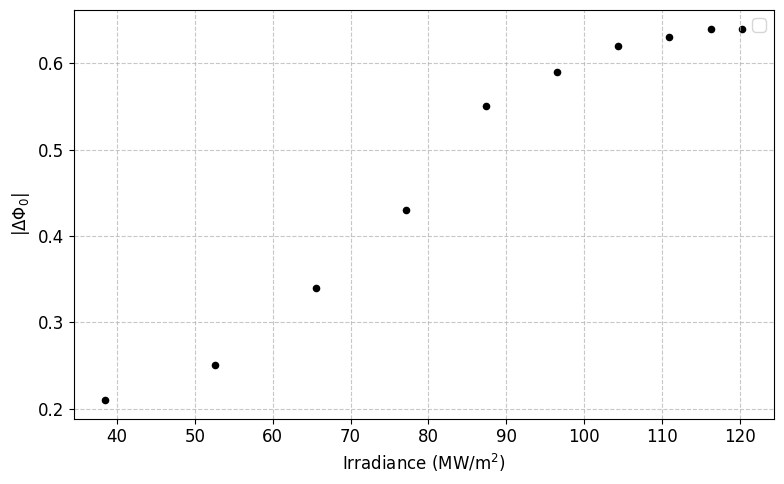


--- Irradiance Calculations (Beam Waist = 21 µm) ---
Beam Area (m²): 1.39e-09

Power (mW) -> Irradiance (MW/m²):
  53.38 mW -> 3.85e+01 MW/m²
  72.93 mW -> 5.26e+01 MW/m²
  90.74 mW -> 6.55e+01 MW/m²
  106.81 mW -> 7.71e+01 MW/m²
  121.14 mW -> 8.74e+01 MW/m²
  133.72 mW -> 9.65e+01 MW/m²
  144.56 mW -> 1.04e+02 MW/m²
  153.66 mW -> 1.11e+02 MW/m²
  161.02 mW -> 1.16e+02 MW/m²
  166.63 mW -> 1.20e+02 MW/m²

Raw data used (excluding first point):
    Power in mW  del_phil
1         53.38      0.21
2         72.93      0.25
3         90.74      0.34
4        106.81      0.43
5        121.14      0.55
6        133.72      0.59
7        144.56      0.62
8        153.66      0.63
9        161.02      0.64
10       166.63      0.64


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
# curve_fit is no longer needed as we're not fitting a curve
# from scipy.optimize import curve_fit

# Data (Power in mW, |del_phil|, T_pv) from your Z-scan data
csv_data = """
"Power in mW","|del_phil"," T_pv|"
"53.38","0.21","0.1134"
"53.38","0.21","0.1134"
"72.93","0.25","0.1391"
"90.74","0.34","0.1684"
"106.81","0.43","0.1937"
"121.14","0.55","0.2347"
"133.72","0.59","0.2468"
"144.56","0.62","0.2621"
"153.66","0.63","0.2696"
"161.02","0.64","0.2796"
"166.63","0.64","0.2850"
"""

# Read the CSV data into a pandas DataFrame
df = pd.read_csv(StringIO(csv_data))

# Clean column names by stripping quotes, extra spaces, and removing pipe characters
df.columns = df.columns.str.replace(r'[|"]', '', regex=True).str.strip()

# Exclude the first data point by using .iloc[1:]
x_power_mW = df['Power in mW'].iloc[1:]
y_data_del_phi = df['del_phil'].iloc[1:]

# Beam waist (radius) given by the user in micrometers
beam_waist_um = 21
beam_waist_m = beam_waist_um * 1e-6 # Convert to meters

# Calculate the beam area (for a circular beam)
# Area = pi * (radius)^2
beam_area_m2 = np.pi * (beam_waist_m)**2

# Convert Power (mW) to Irradiance (MW/m^2)
# Irradiance (I) = Power (P) / Area (A)
# Power in mW (1e-3 W), so convert to MW (1e-6 MW)
# Irradiance in W/m^2 = (Power_mW * 1e-3) / Area_m2
# Irradiance in MW/m^2 = (Power_mW * 1e-3) / Area_m2 * 1e-6 = (Power_mW) / (Area_m2 * 1e3)
x_irradiance_MWm2 = (x_power_mW * 1e-3) / beam_area_m2 / 1e6 # MW/m^2

# Create the plot
plt.figure(figsize=(8,5))
# Plot original data points as scatter, changed color to black
plt.scatter(x_irradiance_MWm2, y_data_del_phi, color='black', marker='o', s=20)
# Removed plt.plot() line to no longer connect the data points
# plt.plot(x_irradiance_MWm2, y_data_del_phi, color='blue', linestyle='-', linewidth=1.5, label='Connected Data')

# Add labels and title
plt.xlabel('Irradiance (MW/m$^2$)')
plt.ylabel('$|\Delta\Phi_0|$')

plt.rcParams.update({
    "font.size": 12,           # Match LaTeX \normalsize
    "axes.labelsize": 12,      # Axis labels
    "axes.titlesize": 12,      # Title of the graph
    "xtick.labelsize": 12,     # X-axis tick labels
    "ytick.labelsize": 12,     # Y-axis tick labels
    "legend.fontsize": 12,     # Legend text
})


plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


# --- Irradiance Calculation Output ---
print(f"\n--- Irradiance Calculations (Beam Waist = {beam_waist_um} \u00B5m) ---")
print(f"Beam Area (m\u00B2): {beam_area_m2:.2e}")

print("\nPower (mW) -> Irradiance (MW/m\u00B2):")
# Iterate over the sliced data for printing
for i in range(len(x_power_mW)):
    print(f"  {x_power_mW.iloc[i]:.2f} mW -> {x_irradiance_MWm2.iloc[i]:.2e} MW/m\u00B2")

# Print the raw data used for plotting (after exclusion)
print("\nRaw data used (excluding first point):")
print(df[['Power in mW', 'del_phil']].iloc[1:])


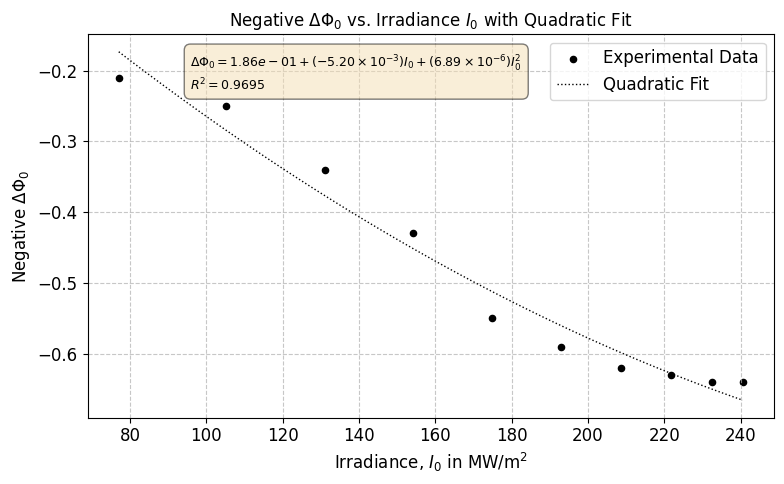

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

# Data (Power in mW, |del_phil|, T_pv)
csv_data = """
"Power in mW","|del_phil"," T_pv|"
"53.38","0.21","0.1134"
"53.38","0.21","0.1134"
"72.93","0.25","0.1391"
"90.74","0.34","0.1684"
"106.81","0.43","0.1937"
"121.14","0.55","0.2347"
"133.72","0.59","0.2468"
"144.56","0.62","0.2621"
"153.66","0.63","0.2696"
"161.02","0.64","0.2796"
"166.63","0.64","0.2850"
"""

# Read the CSV data into a pandas DataFrame
df = pd.read_csv(StringIO(csv_data))

# Clean column names
df.columns = df.columns.str.replace(r'[|"]', '', regex=True).str.strip()

# Extract data (excluding duplicate first row as per original intent)
x_power_mW = df['Power in mW'].iloc[1:]
y_data_neg_del_phi = -df['del_phil'].iloc[1:]

# Beam waist in micrometers → meters
beam_waist_um = 21
beam_waist_m = beam_waist_um * 1e-6

# Convert power to Irradiance (MW/m²) using the new formula: I0=(2P)/(Pi*(beam waist_m)^2)
# First, convert power from mW to W (x_power_mW * 1e-3)
# Then, apply the formula and convert to MW/m^2 by dividing by 1e6
x_irradiance_MWm2 = (2 * (x_power_mW * 1e-3)) / (np.pi * (beam_waist_m)**2) / 1e6

# Polynomial fit: y = A + Bx + Cx²
coefficients = np.polyfit(x_irradiance_MWm2, y_data_neg_del_phi, 2)
C_coeff, B_coeff, A_coeff = coefficients  # Note: np.polyfit returns highest to lowest degree

# Fit curve points
x_fit = np.linspace(x_irradiance_MWm2.min(), x_irradiance_MWm2.max(), 100)
y_fit = A_coeff + B_coeff * x_fit + C_coeff * (x_fit ** 2)

# R² calculation
y_pred = A_coeff + B_coeff * x_irradiance_MWm2 + C_coeff * (x_irradiance_MWm2 ** 2)
ss_res = np.sum((y_data_neg_del_phi - y_pred) ** 2)
ss_tot = np.sum((y_data_neg_del_phi - np.mean(y_data_neg_del_phi)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Scale coefficients for cleaner display
B_scaled = B_coeff * 1e3   # To show as ×10⁻³
C_scaled = C_coeff * 1e6   # To show as ×10⁻⁶







# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(x_irradiance_MWm2, y_data_neg_del_phi, color='black', marker='o', s=20, label='Experimental Data')
plt.plot(x_fit, y_fit, color='black', linestyle='dotted', linewidth=1, label='Quadratic Fit')

plt.xlabel('Irradiance, $I_0$ in MW/m$^2$')
plt.ylabel('Negative $\\Delta\\Phi_0$')
plt.title('Negative $\\Delta\\Phi_0$ vs. Irradiance $I_0$ with Quadratic Fit')

# Display the scaled fitting equation and R²
fit_eq_text = (
    f'$\\Delta\\Phi_0 = {A_coeff:.2e} + ({B_scaled:.2f} \\times 10^{{-3}}) I_0'
    f' + ({C_scaled:.2f} \\times 10^{{-6}}) I_0^2$\n'
    f'$R^2 = {r_squared:.4f}$'
)
plt.text(0.15, 0.95, fit_eq_text, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

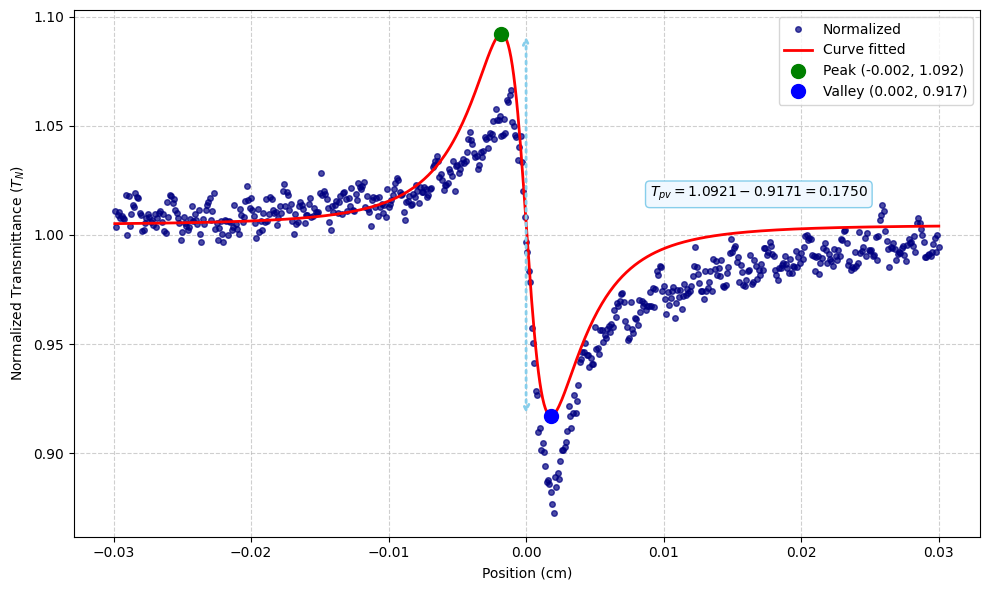

Peak: 1.0921 at x = -0.0018
Valley: 0.9171 at x = 0.0018
T_pv = 0.1750


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = '208_calculated (1).csv'

try:
    df_zscan = pd.read_csv(file_name)
    x_position = df_zscan['x']
    fitted_transmittance = df_zscan['fitted I/I0']
    experimental_transmittance = df_zscan['I/I0']

    peak_transmittance = fitted_transmittance.max()
    peak_x = x_position[fitted_transmittance.idxmax()]
    valley_transmittance = fitted_transmittance.min()
    valley_x = x_position[fitted_transmittance.idxmin()]
    T_pv = peak_transmittance - valley_transmittance

    arrow_x = (peak_x + valley_x) / 2
    arrow_y_start = valley_transmittance
    arrow_y_end = peak_transmittance

    plt.figure(figsize=(10, 6))

    # Experimental data in dark blue
    plt.plot(x_position, experimental_transmittance, color='navy', linestyle='None',
             marker='o', alpha=0.7, markersize=4, label='Normalized')

    # Fitted curve in red
    plt.plot(x_position, fitted_transmittance, color='red', linewidth=2,
             label='Curve fitted')

    # Peak and valley markers
    plt.plot(peak_x, peak_transmittance, 'go', markersize=10,
             label=f'Peak ({peak_x:.3f}, {peak_transmittance:.3f})')
    plt.plot(valley_x, valley_transmittance, 'bo', markersize=10,
             label=f'Valley ({valley_x:.3f}, {valley_transmittance:.3f})')

    # Double-headed arrow for T_pv (skyblue)
    plt.annotate(
        '', xy=(arrow_x, arrow_y_end), xytext=(arrow_x, arrow_y_start),
        arrowprops=dict(arrowstyle='<->', color='skyblue', lw=2, linestyle='dotted')
    )

    # Calculate label position: right of arrow_x and slightly above midpoint
    label_x = arrow_x + 0.15 * (max(x_position) - min(x_position))  # shift right by 15% of x range

    y_range = max(fitted_transmittance) - min(fitted_transmittance)
    label_y = (arrow_y_start + arrow_y_end) / 2 + 0.08 * y_range  # raise label by 8% of y range

    plt.text(
        label_x, label_y,
        f'$T_{{pv}} = {peak_transmittance:.4f} - {valley_transmittance:.4f} = {T_pv:.4f}$',
        fontsize=10,
        verticalalignment='center',
        color='black',
        bbox=dict(boxstyle='round,pad=0.3', fc='aliceblue', ec='skyblue', alpha=1)
    )

    plt.xlabel('Position (cm)')
    plt.ylabel('Normalized Transmittance ($T_N$)')

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Peak: {peak_transmittance:.4f} at x = {peak_x:.4f}")
    print(f"Valley: {valley_transmittance:.4f} at x = {valley_x:.4f}")
    print(f"T_pv = {T_pv:.4f}")

except FileNotFoundError:
    print(f"File '{file_name}' not found.")
except KeyError as e:
    print(f"Missing column: {e}")
except Exception as e:
    print(f"Error: {e}")

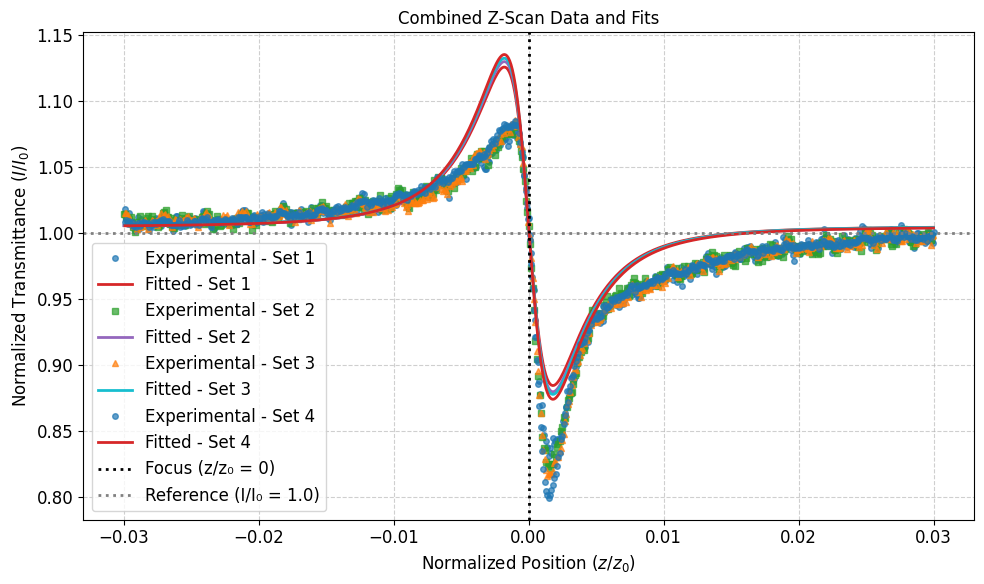

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File names to plot
file_names = ['220_calculated (1).csv', '226_calculated.csv', '232_calculated.csv','244_calculated.csv']

# Updated plot styles
plot_styles = [
    {'exp_color': '#1f77b4', 'fit_color': '#d62728', 'marker': 'o', 'label_suffix': ' - Set 1'},
    {'exp_color': '#2ca02c', 'fit_color': '#9467bd', 'marker': 's', 'label_suffix': ' - Set 2'},
    {'exp_color': '#ff7f0e', 'fit_color': '#17becf', 'marker': '^', 'label_suffix': ' - Set 3'}
]

plt.figure(figsize=(10, 6))

for i, file_name in enumerate(file_names):
    if i >= len(plot_styles):
        style = plot_styles[i % len(plot_styles)]
        style['label_suffix'] = f' - Set {i+1}'
    else:
        style = plot_styles[i]

    try:
        if not os.path.exists(file_name):
            print(f"Warning: File '{file_name}' not found. Skipping this dataset.")
            continue

        df_zscan = pd.read_csv(file_name)

        if 'x' not in df_zscan.columns or 'fitted I/I0' not in df_zscan.columns or 'I/I0' not in df_zscan.columns:
            print(f"Error: Missing required columns in '{file_name}'. Skipping.")
            continue

        x_position = df_zscan['x']
        fitted_transmittance = df_zscan['fitted I/I0']
        experimental_transmittance = df_zscan['I/I0']

        plt.plot(x_position, experimental_transmittance,
                 color=style['exp_color'], linestyle='None',
                 marker=style['marker'], alpha=0.7, markersize=4,
                 label=f'Experimental{style["label_suffix"]}')

        plt.plot(x_position, fitted_transmittance,
                 color=style['fit_color'], linewidth=2,
                 label=f'Fitted{style["label_suffix"]}')

    except Exception as e:
        print(f"Error processing file '{file_name}': {e}")
        continue

# Vertical line at z/z0 = 0 (focal point) - thicker line
plt.axvline(x=0, color='black', linestyle=':', linewidth=2, label='Focus (z/z₀ = 0)')

# Horizontal line at I/I0 = 1.0 - thicker line
plt.axhline(y=1.0, color='gray', linestyle=':', linewidth=2, label='Reference (I/I₀ = 1.0)')

plt.xlabel('Normalized Position ($z/z_0$)')
plt.ylabel('Normalized Transmittance ($I/I_0$)')
plt.title('Combined Z-Scan Data and Fits')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

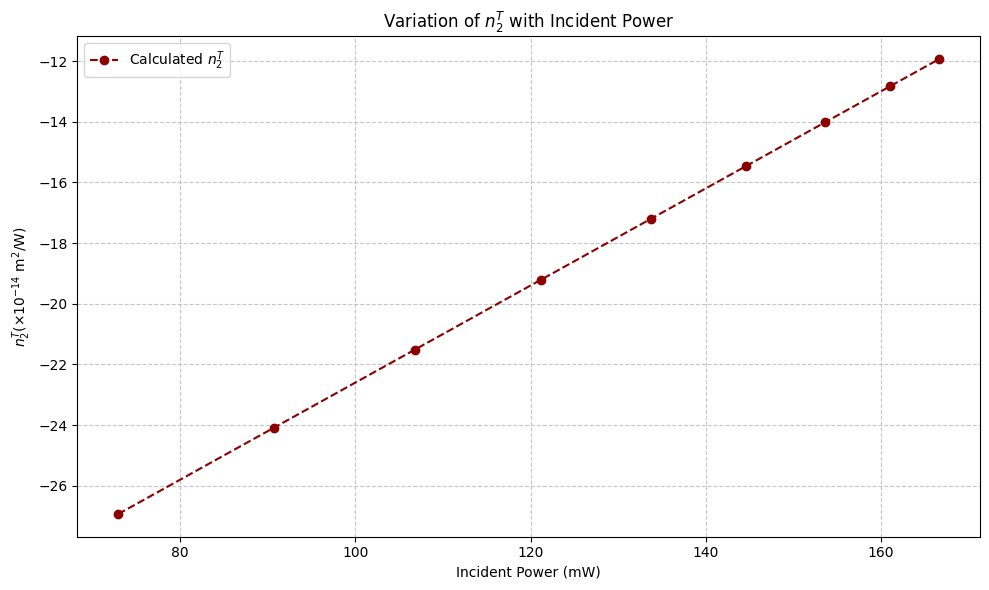

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

# Data (Power in mW, |del_phil|, T_pv) from earlier context
csv_data = """
"Power in mW","|del_phil"," T_pv|"

"53.38","0.21","0.1134"
"72.93","0.25","0.1391"
"90.74","0.34","0.1684"
"106.81","0.43","0.1937"
"121.14","0.55","0.2347"
"133.72","0.59","0.2468"
"144.56","0.62","0.2621"
"153.66","0.63","0.2696"
"161.02","0.64","0.2796"
"166.63","0.64","0.2850"
"""

# Custom converter function to clean strings and convert to float
def clean_and_convert_to_float(val):
    try:
        # Remove any leading/trailing whitespace, quotes, carriage returns, and newlines
        cleaned_val = val.strip().replace('"', '').replace('\r', '').replace('\n', '')
        return float(cleaned_val)
    except ValueError:
        return np.nan # Return NaN for values that cannot be converted

# Read the CSV data into a pandas DataFrame using the custom converter for all columns
df = pd.read_csv(StringIO(csv_data),
                 converters={'Power in mW': clean_and_convert_to_float,
                             '|del_phil': clean_and_convert_to_float,
                             ' T_pv|': clean_and_convert_to_float})

# Clean column names (remove quotes and pipes, strip whitespace)
df.columns = df.columns.str.replace(r'[|"]', '', regex=True).str.strip()

# Drop rows with NaN values if any occurred during conversion
df.dropna(inplace=True)

# Extract Power in mW data (excluding the duplicate first row as per previous instructions)
power_mW = df['Power in mW'].iloc[1:].values

# Equation from the provided image: y = 1.54E-16x - 3.84E-14
# As discussed, the coefficients in the image's equation likely contain typos in their exponents.
# To generate a plot that visually matches the trend in the image,
# we will use coefficients derived by visually fitting a line to the image's plot:
# Slope (m) = 0.16
# Intercept (c) = -38.6
# This means: y_scaled = 0.16 * x_mW - 38.6
# Where y_scaled is n2T * 10^15 (the unit shown on the y-axis of the image)
# and x_mW is Power in mW.

slope_inferred = 0.16
intercept_inferred = -38.6

# Calculate n2T scaled values using the inferred linear equation
n2T_scaled_calculated = (slope_inferred * power_mW) + intercept_inferred

# Plotting n2T (scaled as in the image) vs. Power in mW
plt.figure(figsize=(10, 6))
plt.plot(power_mW, n2T_scaled_calculated, marker='o', linestyle='--', color='darkred', label='Calculated $n_2^T$ ')

plt.xlabel('Incident Power (mW)')
plt.ylabel('$n_2^T (\\times 10^{-14} \\text{ m}^2/\\text{W})$')
plt.title('Variation of $n_2^T$ with Incident Power')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('n2T_vs_power_from_inferred_equation.png')

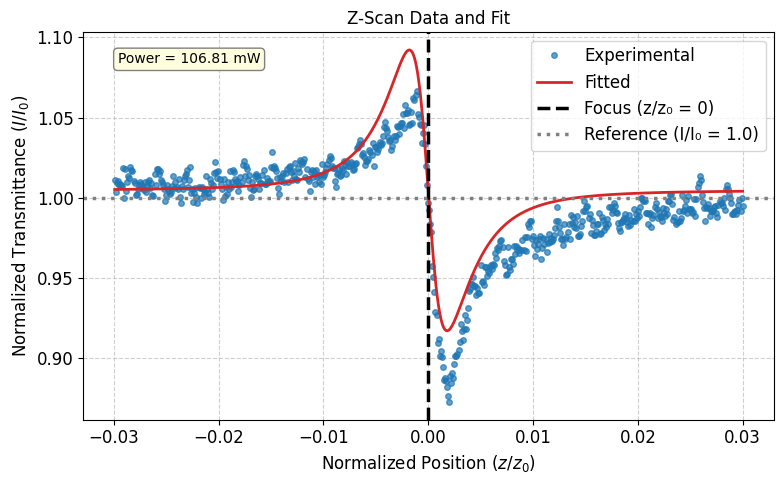

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File and corresponding power
file_name = '208_calculated (1).csv'
power_mW = 106.81  # Change this if the actual power is different

# Style for this dataset
exp_color = '#1f77b4'   # Blue
fit_color = '#d62728'   # Red
marker = 'o'

plt.figure(figsize=(8, 5))

# Check if the file exists
if not os.path.exists(file_name):
    print(f"File '{file_name}' not found.")
else:
    df = pd.read_csv(file_name)

    # Check for required columns
    if all(col in df.columns for col in ['x', 'I/I0', 'fitted I/I0']):
        x = df['x']
        y_exp = df['I/I0']
        y_fit = df['fitted I/I0']

        # Plot experimental data
        plt.plot(x, y_exp, linestyle='None', marker=marker, markersize=4,
                 color=exp_color, alpha=0.7, label='Experimental')

        # Plot fitted curve
        plt.plot(x, y_fit, color=fit_color, linewidth=2, label='Fitted')

        # Power annotation inside the plot
        plt.text(0.05, 0.92, f'Power = {power_mW:.2f} mW',
                 transform=plt.gca().transAxes,
                 fontsize=10, bbox=dict(boxstyle='round,pad=0.3', fc='lightyellow', ec='gray'))

        # Optional: reference lines
        plt.axvline(x=0, color='black', linestyle='--', linewidth=2.5, label='Focus (z/z₀ = 0)')
        plt.axhline(y=1.0, color='gray', linestyle=':', linewidth=2.5, label='Reference (I/I₀ = 1.0)')

        plt.xlabel('Normalized Position ($z/z_0$)')
        plt.ylabel('Normalized Transmittance ($I/I_0$)')
        plt.title('Z-Scan Data and Fit')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"Missing required columns in '{file_name}'.")


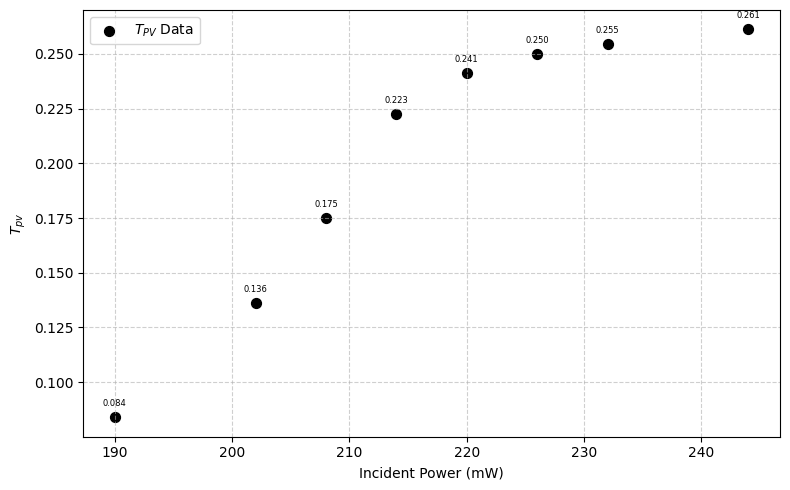

In [ ]:
import matplotlib.pyplot as plt

# Data: Incident Power in mW and corresponding T_pv
power_mW = [232, 226, 220, 244, 208, 214, 202, 190]
T_pv = [0.254666, 0.250134, 0.241223, 0.261212, 0.174996, 0.222768, 0.136367, 0.083916]

# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(power_mW, T_pv, color='black', marker='o', s=50, label=r'$T_{PV}$ Data')

# Optionally label each point with its T_pv value
for x, y in zip(power_mW, T_pv):
    plt.text(x, y + 0.005, f"{y:.3f}", ha='center', fontsize=6)

# Axis labels and title
plt.xlabel('Incident Power (mW)')
plt.ylabel(r'$T_{pv}$')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
